In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings
warnings.simplefilter("ignore")
plt.rcParams["figure.figsize"]=[10,5]

In [ ]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [ ]:
df=pd.read_csv("USA_Housing.csv")

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df.shape

(5000, 7)

In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


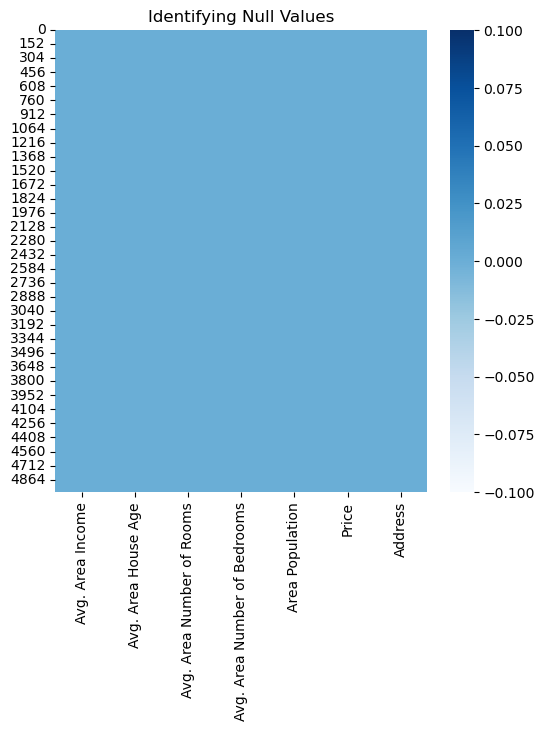

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(),cbar=True,cmap="Blues")
plt.title("Identifying Null Values")
plt.show()

In [ ]:
df.drop("Address",axis=1,inplace=True)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
df.dropna(inplace=True)
df.count()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms    5000
Area Population                 5000
Price                           5000
dtype: int64

In [ ]:
x = df.drop("Price",axis=1)
y = df[["Price"]]

In [ ]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [ ]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [ ]:
from sklearn import preprocessing

pre_x = preprocessing.StandardScaler().fit(x)
x_transform = pre_x.fit_transform(x)

pre_y = preprocessing.StandardScaler().fit(y)
y_transform = pre_y.fit_transform(y)

In [ ]:
x_transform.shape

(5000, 5)

In [ ]:
y_transform.shape

(5000, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_transform,y_transform,test_size=.10,random_state=101)

In [ ]:
x_train.shape

(4500, 5)

In [ ]:
y_test.shape

(500, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = l_reg.predict(x_test)
print(y_pred)

[[ 7.08770782e-02]
 [-1.16116236e+00]
 [ 1.43709251e+00]
 [-7.33380624e-01]
 [-6.74500500e-01]
 [-1.66062709e+00]
 [-4.46524314e-01]
 [-1.06379917e+00]
 [ 6.03190733e-01]
 [-8.56030840e-02]
 [ 6.29889563e-01]
 [ 1.82706221e-01]
 [ 1.42965357e+00]
 [ 2.96310328e-01]
 [ 4.36746182e-01]
 [-2.53490585e-02]
 [-1.74529237e+00]
 [-7.57775229e-01]
 [-2.84693278e-02]
 [-9.78251659e-02]
 [-2.05423965e+00]
 [ 1.51755468e+00]
 [ 1.76377221e+00]
 [-9.50239580e-02]
 [-4.72094032e-01]
 [ 1.63737167e+00]
 [ 1.51737311e+00]
 [ 5.89353567e-01]
 [ 4.36300139e-01]
 [ 8.72035453e-01]
 [-1.42321126e+00]
 [ 1.47943417e+00]
 [ 6.60470410e-01]
 [-5.83577393e-01]
 [ 1.45693861e-01]
 [-8.90399530e-01]
 [-1.31390376e-01]
 [-6.56885801e-01]
 [ 2.75494242e-01]
 [-1.26828883e+00]
 [ 4.54443104e-01]
 [-1.85651710e+00]
 [-1.15725850e+00]
 [ 1.87441444e+00]
 [ 1.24473266e+00]
 [-7.57196219e-01]
 [-2.91126861e-01]
 [-1.24474568e+00]
 [-2.05876114e-01]
 [ 6.82947244e-01]
 [ 6.44197274e-01]
 [-1.91399546e-01]
 [-3.7758805

In [ ]:
results = np.column_stack((y_test,y_pred))

print("Actual Values   |  Predicted Values ")
print("----------------------------------")
for actual,predicted in results:
    print(f"{actual:14.2f}  | {predicted:12.2f}")

Actual Values   |  Predicted Values 
----------------------------------
          0.06  |         0.07
         -1.02  |        -1.16
          1.32  |         1.44
         -0.48  |        -0.73
         -0.80  |        -0.67
         -1.42  |        -1.66
         -0.18  |        -0.45
         -1.49  |        -1.06
          0.76  |         0.60
          0.16  |        -0.09
          0.59  |         0.63
          0.13  |         0.18
          1.48  |         1.43
          0.79  |         0.30
          0.59  |         0.44
         -0.32  |        -0.03
         -1.43  |        -1.75
         -0.26  |        -0.76
         -0.45  |        -0.03
          0.44  |        -0.10
         -2.34  |        -2.05
          0.62  |         1.52
          1.54  |         1.76
         -0.09  |        -0.10
         -0.36  |        -0.47
          1.71  |         1.64
          1.60  |         1.52
          0.54  |         0.59
          0.38  |         0.44
          0.74  |         0.8

In [ ]:
y_test = y_test.ravel()
y_pred = y_pred.ravel()

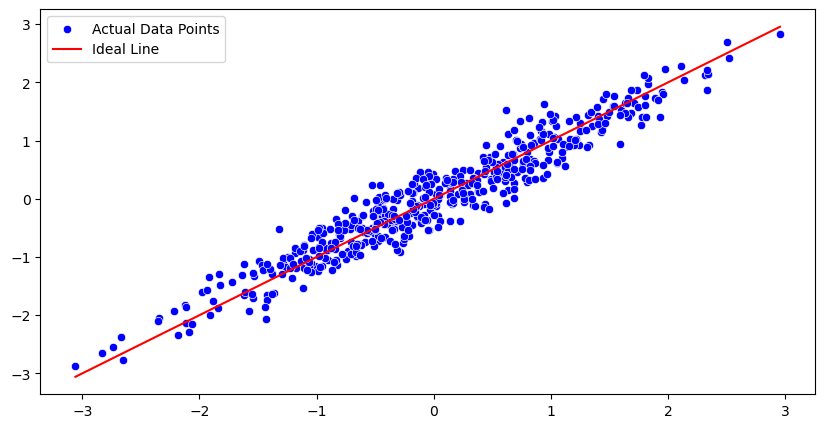

In [ ]:
sns.scatterplot(x=y_test,y=y_pred,color="blue",label="Actual Data Points")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="red",label="Ideal Line")
plt.legend()
plt.show()

In [ ]:
residual = actual-y_pred.reshape(-1)
print(residual)

[-1.26876078e+00 -3.67213417e-02 -2.63497621e+00 -4.64503078e-01
 -5.23383202e-01  4.62743386e-01 -7.51359388e-01 -1.34084535e-01
 -1.80107444e+00 -1.11228062e+00 -1.82777327e+00 -1.38058992e+00
 -2.62753728e+00 -1.49419403e+00 -1.63462988e+00 -1.17253464e+00
  5.47408671e-01 -4.40108473e-01 -1.16941437e+00 -1.10005854e+00
  8.56355948e-01 -2.71543838e+00 -2.96165591e+00 -1.10285974e+00
 -7.25789670e-01 -2.83525537e+00 -2.71525681e+00 -1.78723727e+00
 -1.63418384e+00 -2.06991916e+00  2.25327554e-01 -2.67731787e+00
 -1.85835411e+00 -6.14306309e-01 -1.34357756e+00 -3.07484172e-01
 -1.06649333e+00 -5.40997901e-01 -1.47337794e+00  7.04051304e-02
 -1.65232681e+00  6.58633397e-01 -4.06251973e-02 -3.07229814e+00
 -2.44261636e+00 -4.40687483e-01 -9.06756841e-01  4.68619823e-02
 -9.92007588e-01 -1.88083095e+00 -1.84208098e+00 -1.00648416e+00
 -8.20295648e-01 -1.56064752e+00 -9.65015452e-02 -4.98969798e-01
 -8.90473605e-01 -1.25548909e+00 -1.74886844e+00  8.75489243e-01
 -1.84729828e+00 -8.41273

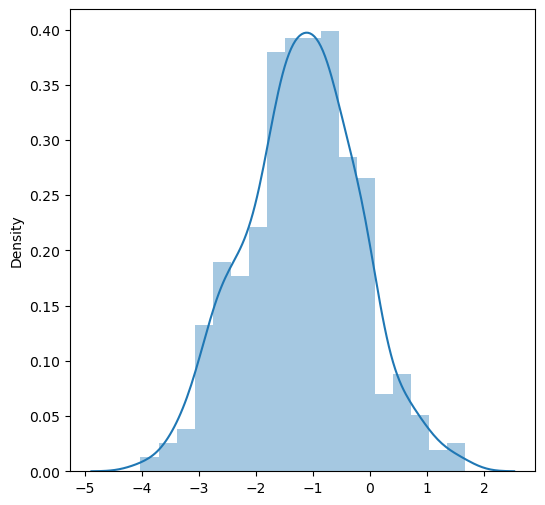

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(residual,kde=True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

print("Linear Regression Value")
print("---------------------------------------------")

mse = mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)

print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",rmse)

Linear Regression Value
---------------------------------------------
Mean Squared Error:  0.07892981267498214
Root Mean Squared Error:  0.2809445010584513


In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT_r = DecisionTreeRegressor()
DT_r.fit(x_train,y_train)

DT_pred = DT_r.predict(x_test)
DT_mse = mean_squared_error(DT_pred,y_test)

print("Decision Tree Regression Value")
print("-------------------------------------------")
print("Mean Squared Error: ",DT_mse)

Decision Tree Regression Value
-------------------------------------------
Mean Squared Error:  0.23935206891206706


In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_r = RandomForestRegressor()
RF_r.fit(x_train,y_train)

RF_pred = RF_r.predict(x_test)
RF_mse = mean_squared_error(RF_pred,y_test)

print("Random Forest Regression Value")
print("-------------------------------------------")
print("Mean Squuared Error: ",RF_mse)

Random Forest Regression Value
-------------------------------------------
Mean Squuared Error:  0.11416055393824592


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GB_r = GradientBoostingRegressor()
GB_r.fit(x_train,y_train)

GB_pred = GB_r.predict(x_test)
GB_mse = mean_squared_error(GB_pred,y_test)

print("Gradient Boosting Regression Value")
print("-------------------------------------------")
print("Mean Squared Error: ",GB_mse)

Gradient Boosting Regression Value
-------------------------------------------
Mean Squared Error:  0.09652379099897412


In [ ]:
model_scores = {
    "Linear Regression Value":0.07892981267498214,
    "Decision Tree Regression Value":0.23935206891206706,
    "Random Forest Regression Value":0.11416055393824592,
    "Gradient Boosting Regression Value":0.09652379099897412}

sorted_scores = sorted(model_scores.items() , key=lambda x:x[1])

print("Regression Errors[Lower Values Shows Efficiency]")
p
for rank,(model_name,score) in enumerate(sorted_scores,start=1):
    print(f"{rank}. {model_name} : {score}")


Regression Errors[Lower Values Shows Efficiency]
1. Linear Regression Value : 0.07892981267498214
2. Gradient Boosting Regression Value : 0.09652379099897412
3. Random Forest Regression Value : 0.11416055393824592
4. Decision Tree Regression Value : 0.23935206891206706
